|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |

#### Bibliotecas

In [161]:
import numpy as np
from prettytable import PrettyTable, TableStyle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

#### Ajuste dos dados

In [162]:
dados = np.fromfile('rna-2025.1-pp2.1-dados/dataHoldout.txt')
dados

array([-0.29322959, -0.09065359,  1.        , ...,  0.72930655,
        0.93224271,  0.        ])

In [163]:
m = dados.size//3
dados = dados.reshape((m,1,3))
print(dados.shape)
print(dados.dtype)

(800, 1, 3)
float64


In [164]:
dados

array([[[-0.29322959, -0.09065359,  1.        ]],

       [[ 0.07988839,  0.21101297,  1.        ]],

       [[-0.07825563, -0.08083512,  1.        ]],

       ...,

       [[ 0.65980493,  1.05876739,  0.        ]],

       [[ 1.09867123,  0.87404891,  0.        ]],

       [[ 0.72930655,  0.93224271,  0.        ]]])

In [165]:
X = np.array([[linha[0][0], linha[0][1]] for linha in dados])
y = np.array([[linha[0][2]] for linha in dados]).ravel()

In [166]:
X

array([[-0.29322959, -0.09065359],
       [ 0.07988839,  0.21101297],
       [-0.07825563, -0.08083512],
       ...,
       [ 0.65980493,  1.05876739],
       [ 1.09867123,  0.87404891],
       [ 0.72930655,  0.93224271]])

In [167]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Gráfico do Problema Não-Linearmente Separável

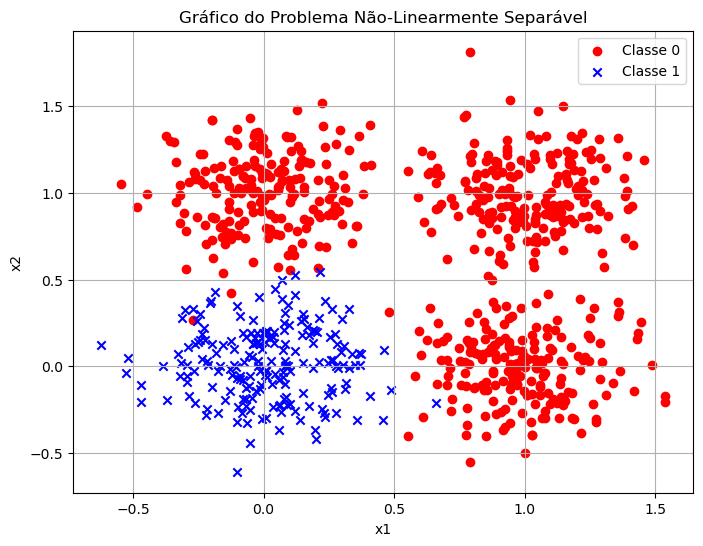

In [168]:
# Separar os pontos por classe
X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Classe 1')

plt.title("Gráfico do Problema Não-Linearmente Separável")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

#### Partição Holdout 70/30

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

X_train

array([[-0.21748562,  0.03151915],
       [-0.18164836,  0.0789158 ],
       [ 0.34015635,  0.06961302],
       ...,
       [-0.0180137 ,  0.39719079],
       [-0.1985048 ,  1.41827045],
       [ 0.28066172,  0.13031361]])

#### Perceptron

In [170]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100, weights=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = weights
        self.bias = None
        self.necessary_epochs = None
        self.total_adjust = 0
    
    def step(self, x):
        return 1 if x >= 0 else 0

    def check_error(self, y_predicted, y):
        return y_predicted != y

    def fit(self, X, y):
        if self.weights is None:
            self.weights = np.random.uniform(low=-0.5, high=0.5, size=X.shape[1])
        self.bias = 0
        self.necessary_epochs = 0

        for epoch in range(self.epochs):
            self.necessary_epochs += 1
            error_counter = 0

            # Embaralhando os exemplos do conjunto de treinamento a cada época:
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for idx, x_i in enumerate(X_shuffled):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                if self.check_error(y_predicted, y_shuffled[idx]):
                    update = self.learning_rate * (y_shuffled[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_counter += 1
                    self.total_adjust += 1

            if error_counter == 0:
                return

    def predict(self, X):
        return np.array([self.step(np.dot(x_i, self.weights) + self.bias) for x_i in X])


In [171]:
modelo = Perceptron()
modelo.fit(X_train, y_train)

In [172]:
y_pred = modelo.predict(X_test)

#### 1 - Matriz de Confusão (conjunto de testes)

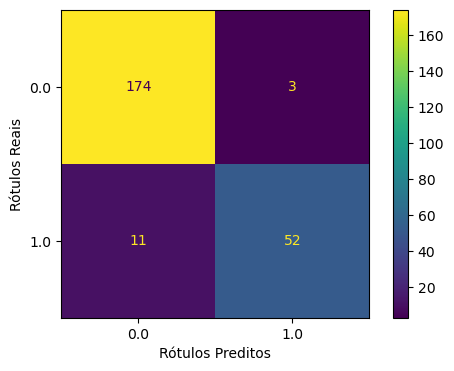

In [173]:
fig, ax = plt.subplots(figsize = (6, 4))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax)

ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 10)

plt.show()

#### 2 - Acurácia (conjunto de treinamento)

In [ ]:
y_train_pred = modelo.predict(X_train)

acuracia = accuracy_score(y_train, y_train_pred)

print(f"Acurácia no conjunto de treinamento: {acuracia * 100:.1f}%")

Acurácia no conjunto de treinamento: 96.07%


#### 3 - Precisão, Revocação e F1-Score (conjunto de treinamento)

In [177]:
precisao = precision_score(y_test, y_pred)
revocacao = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisão: {precisao * 100:.1f}%")
print(f"Revocação: {revocacao * 100:.1f}%")
print(f"F1-Score: {f1 * 100:.1f}%")

Precisão: 94.5%
Revocação: 82.5%
F1-Score: 88.1%
